<a href="https://colab.research.google.com/github/ItsPranavz/sparkathon-scaio/blob/main/Load_Optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

# Genetic Algorithm Updating α, β, γ Values for a Supply Chain in Holt-Winters Model



In [ ]:
def best_selector(curr_max_error, error_val, a, b, g, best_a, best_b, best_g) :
    if(error_val < curr_max_error) :
        return a, b, g
    return best_a, best_b, best_g
def forecasted (demand, pre_forecasted, seasonality, trend, a, b, g) :
    num_demand = np.array(demand)
    num_seasonality = np.array(seasonality)
    num_trend = np.array(trend)
    pre_forecasted = np.array(pre_forecasted)
    Level =  a * (num_demand / num_seasonality) + (1 - a) * (pre_forecasted)
    Trend = b * ( Level - demand) + (1 - b) * num_trend
    Seasonality = g * (Level / demand) +  (1 - g) * num_seasonality
    forecaste = Level * Seasonality + Trend
    return forecaste.tolist(), Seasonality.tolist(), Trend.tolist()

def error(demand, forecasted) :
    num_demand = np.array(demand)
    num_forecasted = np.array(forecasted)
    error_val = np.sum(np.absolute(num_demand - num_forecasted)) / len(demand)
    return error_val

def update(a, b, g):
    a += lerp(-0.1, 0.1, np.random.rand())
    b += lerp(-0.1, 0.1, np.random.rand())
    g += lerp(-0.1, 0.1, np.random.rand())
    a = np.clip(a, 0, 1)
    b = np.clip(b, 0, 1)
    g = np.clip(g, 0, 1)
    return a, b, g

def lerp(a, b, t) :
    return a + (b - a) * t

def func(demand, pre_forecasted, seasonality, trend, best_a, best_b, best_g, curr_max_error) :
    predict, season, trend = forecasted(demand, pre_forecasted, seasonality, trend, best_a, best_b, best_g)
    error_value = error(pre_forecasted, demand)
    a, b, g = update(best_a, best_b, best_g)
    best_a, best_b, best_g = best_selector(curr_max_error, error_value, a, b, g, best_a, best_b, best_g)
    return best_a, best_b, best_g, error_value, predict, season, trend
n_stores = 20
n_dcs = 10
pre_forecasted = np.random.randint(100, 200, n_stores)
seasonality = np.random.rand(n_stores)
trend = np.random.randint(100, 200)
curr_max_error = 100000000
best_a = 0.5
best_b = 0.5
best_g = 0.5
for day in range(100):
    demand = np.random.randint(100, 200, n_stores)
    best_a, best_b, best_g, error_value, predict, new_season, new_trend = func(demand, pre_forecasted, seasonality, trend, best_a, best_b, best_g, curr_max_error)
    print("Error on : " + str(day) + " " + str(error_value))
    curr_max_error = min(curr_max_error,error_value)
    pre_forecasted = predict
    seasonality = new_season
    trend = new_trend

## Working on the Initilisation


In [ ]:
import numpy as np

def forecasted(demand, pre_forecasted, seasonality, trend, a, b, g):
    num_demand = np.array(demand)
    num_seasonality = np.array(seasonality)
    num_trend = np.array(trend)
    pre_forecasted = np.array(pre_forecasted)

    Level = a * (num_demand / num_seasonality) + (1 - a) * (pre_forecasted + num_trend)
    Trend = b * (Level - pre_forecasted) + (1 - b) * num_trend
    Seasonality = g * (num_demand / Level) + (1 - g) * num_seasonality
    forecast = (Level + Trend) * Seasonality

    return forecast.tolist(), Seasonality.tolist(), Trend.tolist(), Level.tolist()

def error(demand, forecasted):
    num_demand = np.array(demand)
    num_forecasted = np.array(forecasted)
    error_val = np.mean(np.abs(num_demand - num_forecasted))
    return error_val

def update(a, b, g, error_gradient, learning_rate=0.01):
    a -= learning_rate * error_gradient
    b -= learning_rate * error_gradient
    g -= learning_rate * error_gradient
    return np.clip(a, 0, 1), np.clip(b, 0, 1), np.clip(g, 0, 1)

def func(demand, pre_forecasted, seasonality, trend, a, b, g):
    predict, season, new_trend, level = forecasted(demand, pre_forecasted, seasonality, trend, a, b, g)
    error_value = error(demand, predict)
    error_gradient = (np.array(predict) - np.array(demand)).mean()
    a, b, g = update(a, b, g, error_gradient)
    return a, b, g, error_value, predict, season, new_trend

n_stores = 20
pre_forecasted = np.random.randint(100, 200, n_stores)
seasonality = np.random.rand(n_stores) + 0.5  # Ensure seasonality is positive
trend = np.random.randint(1, 10, n_stores)  # Smaller trend values
a, b, g = 0.2, 0.2, 0.2  # Start with small values

for day in range(500):
    demand = np.random.randint(100, 200, n_stores)
    a, b, g, error_value, predict, new_season, new_trend = func(demand, pre_forecasted, seasonality, trend, a, b, g)
    print(f"Day {day}: Error = {error_value:.2f}, a = {a:.4f}, b = {b:.4f}, g = {g:.4f}")
    pre_forecasted = predict
    seasonality = new_season
    trend = new_trend

Day 0: Error = 25.11, a = 0.0670, b = 0.0670, g = 0.0670
Day 1: Error = 62.03, a = 0.0000, b = 0.0000, g = 0.0000
Day 2: Error = 78.19, a = 0.0000, b = 0.0000, g = 0.0000
Day 3: Error = 132.99, a = 0.0000, b = 0.0000, g = 0.0000
Day 4: Error = 160.42, a = 0.0000, b = 0.0000, g = 0.0000
Day 5: Error = 222.04, a = 0.0000, b = 0.0000, g = 0.0000
Day 6: Error = 295.05, a = 0.0000, b = 0.0000, g = 0.0000
Day 7: Error = 391.04, a = 0.0000, b = 0.0000, g = 0.0000
Day 8: Error = 531.91, a = 0.0000, b = 0.0000, g = 0.0000
Day 9: Error = 702.50, a = 0.0000, b = 0.0000, g = 0.0000
Day 10: Error = 942.83, a = 0.0000, b = 0.0000, g = 0.0000
Day 11: Error = 1278.33, a = 0.0000, b = 0.0000, g = 0.0000
Day 12: Error = 1715.68, a = 0.0000, b = 0.0000, g = 0.0000
Day 13: Error = 2345.99, a = 0.0000, b = 0.0000, g = 0.0000
Day 14: Error = 3192.95, a = 0.0000, b = 0.0000, g = 0.0000
Day 15: Error = 4363.32, a = 0.0000, b = 0.0000, g = 0.0000
Day 16: Error = 5983.66, a = 0.0000, b = 0.0000, g = 0.0000
Day 

## Working on initialisation of α, β, γ

In [ ]:
import numpy as np

def initialize_parameters(n_stores):
    seasonality = np.ones(n_stores)  # Start with neutral seasonality
    trend = np.zeros(n_stores)  # Start with no trend
    level = np.mean(demand)  # Initialize level to mean of first demand
    return seasonality, trend, level

def forecasted(demand, level, trend, seasonality, a, b, g):
    num_demand = np.array(demand)
    num_seasonality = np.array(seasonality)
    num_trend = np.array(trend)

    new_level = a * (num_demand / num_seasonality) + (1 - a) * (level + num_trend)
    new_trend = b * (new_level - level) + (1 - b) * num_trend
    new_seasonality = g * (num_demand / new_level) + (1 - g) * num_seasonality
    forecast = (new_level + new_trend) * new_seasonality

    return forecast, new_seasonality, new_trend, new_level

def error(demand, forecasted):
    return np.mean(np.abs((demand - forecasted)))

def update(a, b, g, error_gradient, learning_rate=0.001):
    a -= learning_rate * error_gradient
    b -= learning_rate * error_gradient
    g -= learning_rate * error_gradient
    return np.clip(a, 0.01, 0.99), np.clip(b, 0.01, 0.99), np.clip(g, 0.01, 0.99)

def func(demand, level, trend, seasonality, a, b, g):
    forecast, new_seasonality, new_trend, new_level = forecasted(demand, level, trend, seasonality, a, b, g)
    error_value = error(demand, forecast)
    error_gradient = np.mean((forecast - demand) / demand)
    a, b, g = update(a, b, g, error_gradient)
    return a, b, g, error_value, forecast, new_seasonality, new_trend, new_level

n_stores = 20
demand_history = []
a, b, g = 0.1, 0.1, 0.1  # Start with small values

# Generate some initial demand data
for _ in range(10):
    demand = np.random.randint(100, 200, n_stores)
    demand_history.append(demand)

# Initialize parameters
seasonality, trend, level = initialize_parameters(n_stores)
for day in range(500):
    demand = np.random.randint(100, 100000, n_stores)
    demand_history.append(demand)
    if day >= 10:  # Start forecasting after we have some history
        a, b, g, error_value, forecast, seasonality, trend, level = func(demand, level, trend, seasonality, a, b, g)
        print(f"Day {day}: Error : {error_value}")
    else:
        print(f"Day {day}: Initializing...")

Day 0: Initializing...
Day 1: Initializing...
Day 2: Initializing...
Day 3: Initializing...
Day 4: Initializing...
Day 5: Initializing...
Day 6: Initializing...
Day 7: Initializing...
Day 8: Initializing...
Day 9: Initializing...
Day 10: Error : 42737.67051700121
Day 11: Error : 30539.1611775555
Day 12: Error : 21421.209532466222
Day 13: Error : 24354.223507578623
Day 14: Error : 20246.751323797722
Day 15: Error : 17491.493905739564
Day 16: Error : 23174.702197730792
Day 17: Error : 22808.02537064543
Day 18: Error : 26392.248939932597
Day 19: Error : 21405.073459522922
Day 20: Error : 27961.402585768792
Day 21: Error : 23768.335511127072
Day 22: Error : 20508.889465335327
Day 23: Error : 24378.0821441203
Day 24: Error : 26814.74211342075
Day 25: Error : 22195.415061557265
Day 26: Error : 20515.250193223863
Day 27: Error : 26776.593573153757
Day 28: Error : 31101.574347605325
Day 29: Error : 23001.444338378788
Day 30: Error : 28426.670167489927
Day 31: Error : 33218.42839014318
Day 32: 

## Independently optimizing α, β, γ and adoption of adaptive learning rate scheme


In [ ]:
import numpy as np

def initialize_parameters(n_stores):
    seasonality = np.ones(n_stores)
    trend = np.zeros(n_stores)
    level = np.zeros(n_stores)
    return seasonality, trend, level

def forecasted(demand, level, trend, seasonality, a, b, g):
    new_level = a * (demand / seasonality) + (1 - a) * (level + trend)
    new_trend = b * (new_level - level) + (1 - b) * trend
    new_seasonality = g * (demand / new_level) + (1 - g) * seasonality
    forecast = (new_level + new_trend) * new_seasonality
    return forecast, new_seasonality, new_trend, new_level

def error(demand, forecasted):
    return np.mean(np.abs((demand - forecasted)))  # Modified MAPE

def update(params, gradients, learning_rates):
    new_params = []
    for param, gradient, lr in zip(params, gradients, learning_rates):
        new_param = np.clip(param - lr * np.mean(gradient), 0.01, 0.99)
        new_params.append(float(new_param))  # Ensure it's a Python float
    return new_params

def func(demand, level, trend, seasonality, params, learning_rates):
    a, b, g = params
    forecast, new_seasonality, new_trend, new_level = forecasted(demand, level, trend, seasonality, a, b, g)
    error_value = error(demand, forecast)
    gradients = [(forecast - demand) / (demand + 1) for _ in range(3)]
    new_params = update(params, gradients, learning_rates)
    return new_params, error_value, forecast, new_seasonality, new_trend, new_level

n_stores = 20
demand_history = []
params = [0.1, 0.1, 0.1]  # a, b, g
learning_rates = [0.01, 0.01, 0.01]  # separate learning rate for each parameter

seasonality, trend, level = initialize_parameters(n_stores)

for day in range(1000):
    demand = np.random.randint(100, 10000, n_stores)
    demand_history.append(demand)

    if day >= 10:
        # Use moving average of demand
        avg_demand = np.mean(demand_history[-10:], axis=0)
        params, error_value, forecast, seasonality, trend, level = func(avg_demand, level, trend, seasonality, params, learning_rates)

        # Adaptive learning rate
        for i in range(3):
            if day > 10 and error_value > prev_error:
                learning_rates[i] *= 0.9
            else:
                learning_rates[i] *= 1.1
            learning_rates[i] = np.clip(learning_rates[i], 1e-6, 0.1)

        print(f"Day {day}: Error = {error_value:.2f}, a = {params[0]:.4f}, b = {params[1]:.4f}, g = {params[2]:.4f}")
        prev_error = error_value
    else:
        print(f"Day {day}: Initializing...")
        level = np.mean(demand_history, axis=0)
        prev_error = float('inf')

Day 0: Initializing...
Day 1: Initializing...
Day 2: Initializing...
Day 3: Initializing...
Day 4: Initializing...
Day 5: Initializing...
Day 6: Initializing...
Day 7: Initializing...
Day 8: Initializing...
Day 9: Initializing...
Day 10: Error = 233.07, a = 0.0999, b = 0.0999, g = 0.0999
Day 11: Error = 293.20, a = 0.0997, b = 0.0997, g = 0.0997
Day 12: Error = 400.78, a = 0.0994, b = 0.0994, g = 0.0994
Day 13: Error = 358.62, a = 0.0992, b = 0.0992, g = 0.0992
Day 14: Error = 373.76, a = 0.0989, b = 0.0989, g = 0.0989
Day 15: Error = 278.33, a = 0.0988, b = 0.0988, g = 0.0988
Day 16: Error = 290.00, a = 0.0985, b = 0.0985, g = 0.0985
Day 17: Error = 327.19, a = 0.0983, b = 0.0983, g = 0.0983
Day 18: Error = 351.50, a = 0.0982, b = 0.0982, g = 0.0982
Day 19: Error = 445.36, a = 0.0979, b = 0.0979, g = 0.0979
Day 20: Error = 536.03, a = 0.0979, b = 0.0979, g = 0.0979
Day 21: Error = 617.15, a = 0.0980, b = 0.0980, g = 0.0980
Day 22: Error = 495.23, a = 0.0981, b = 0.0981, g = 0.0981
Day

## Independently optimizing α, β, γ and adoption of adaptive learning rate scheme v2


In [ ]:
import numpy as np

def initialize_parameters(n_stores):
    seasonality = np.ones(n_stores)
    trend = np.zeros(n_stores)
    level = np.zeros(n_stores)
    return seasonality, trend, level

def forecasted(demand, level, trend, seasonality, a, b, g):
    new_level = a * (demand / seasonality) + (1 - a) * (level + trend)
    new_trend = b * (new_level - level) + (1 - b) * trend
    new_seasonality = g * (demand / new_level) + (1 - g) * seasonality
    forecast = (new_level + new_trend) * new_seasonality
    return forecast, new_seasonality, new_trend, new_level

def error(demand, forecasted):
    return np.mean(np.abs((demand - forecasted)))  # Modified MAPE

def update_param(param, gradient, learning_rate, lower_bound, upper_bound):
    new_param = param - learning_rate * np.mean(gradient)
    return np.clip(new_param, lower_bound, upper_bound)

def func(demand, level, trend, seasonality, params, learning_rates):
    a, b, g = params
    forecast, new_seasonality, new_trend, new_level = forecasted(demand, level, trend, seasonality, a, b, g)
    error_value = error(demand, forecast)

    # Compute gradients
    level_grad = (forecast - demand) / (demand + 1)
    trend_grad = level_grad * (1 - a)
    season_grad = level_grad * demand / new_level

    # Update parameters
    new_a = update_param(a, level_grad, learning_rates[0], 0.01, 0.3)
    new_b = update_param(b, trend_grad, learning_rates[1], 0.01, 0.1)
    new_g = update_param(g, season_grad, learning_rates[2], 0.01, 0.3)

    return [new_a, new_b, new_g], error_value, forecast, new_seasonality, new_trend, new_level

n_stores = 20
demand_history = []
params = [0.1, 0.01, 0.1]  # Initial a, b, g
learning_rates = [0.001, 0.0001, 0.001]  # Separate learning rate for each parameter

seasonality, trend, level = initialize_parameters(n_stores)

for day in range(100):
    demand = np.random.randint(100, 10000, n_stores)
    demand_history.append(demand)

    if day >= 10:
        # Use moving average of demand
        avg_demand = np.mean(demand_history[-10:], axis=0)
        params, error_value, forecast, seasonality, trend, level = func(avg_demand, level, trend, seasonality, params, learning_rates)

        # Adaptive learning rate
        for i in range(3):
            if day > 10 and error_value > prev_error:
                learning_rates[i] *= 0.95
            else:
                learning_rates[i] *= 1.05
            learning_rates[i] = np.clip(learning_rates[i], 1e-6, 0.01)

        print(f"Day {day}: Error = {error_value:.4f}, a = {params[0]:.4f}, b = {params[1]:.4f}, g = {params[2]:.4f}")
        prev_error = error_value
    else:
        print(f"Day {day}: Initializing...")
        level = np.mean(demand_history, axis=0)
        prev_error = float('inf')

Day 0: Initializing...
Day 1: Initializing...
Day 2: Initializing...
Day 3: Initializing...
Day 4: Initializing...
Day 5: Initializing...
Day 6: Initializing...
Day 7: Initializing...
Day 8: Initializing...
Day 9: Initializing...
Day 10: Error = 320.0174, a = 0.1000, b = 0.0100, g = 0.1000
Day 11: Error = 267.8654, a = 0.1000, b = 0.0100, g = 0.1000
Day 12: Error = 401.6737, a = 0.0999, b = 0.0100, g = 0.0999
Day 13: Error = 437.7377, a = 0.0998, b = 0.0100, g = 0.0999
Day 14: Error = 474.3115, a = 0.0998, b = 0.0100, g = 0.0999
Day 15: Error = 385.2274, a = 0.0998, b = 0.0100, g = 0.0999
Day 16: Error = 400.5476, a = 0.0998, b = 0.0100, g = 0.0999
Day 17: Error = 470.0412, a = 0.0998, b = 0.0100, g = 0.0999
Day 18: Error = 601.0429, a = 0.0998, b = 0.0100, g = 0.1000
Day 19: Error = 602.5488, a = 0.0998, b = 0.0100, g = 0.1000
Day 20: Error = 617.7613, a = 0.0998, b = 0.0100, g = 0.1001
Day 21: Error = 512.9020, a = 0.0998, b = 0.0100, g = 0.1001
Day 22: Error = 528.5375, a = 0.0999, 

## Using deap module for the implementation of genetic *algorithms*

In [ ]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 1.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
from deap import base, creator, tools, algorithms

def forecasted(demand, pre_forecasted, seasonality, trend, a, b, g):
    num_demand = np.array(demand)
    num_seasonality = np.array(seasonality)
    num_trend = np.array(trend)
    pre_forecasted = np.array(pre_forecasted)
    Level = a * (num_demand / num_seasonality) + (1 - a) * pre_forecasted
    Trend = b * (Level - pre_forecasted) + (1 - b) * num_trend
    Seasonality = g * (num_demand / Level) + (1 - g) * num_seasonality
    forecast = Level * Seasonality + Trend
    return forecast.tolist(), Seasonality.tolist(), Trend.tolist()

def error(demand, forecasted):
    num_demand = np.array(demand)
    num_forecasted = np.array(forecasted)
    error_val = np.mean(np.abs(num_demand - num_forecasted))
    return error_val

def evaluate(individual, demand, pre_forecasted, seasonality, trend):
    a, b, g = individual
    forecast, _, _ = forecasted(demand, pre_forecasted, seasonality, trend, a, b, g)
    return error(demand, forecast),

# Setup genetic algorithm
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

def optimize_parameters(demand, pre_forecasted, seasonality, trend, population_size=50, generations=50):
    toolbox.register("evaluate", evaluate, demand=demand, pre_forecasted=pre_forecasted,
                     seasonality=seasonality, trend=trend)

    population = toolbox.population(n=population_size)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    population, logbook = algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2,
                                              ngen=generations, stats=stats, verbose=False)

    best_individual = tools.selBest(population, k=1)[0]
    return best_individual

def func(demand, pre_forecasted, seasonality, trend, best_a, best_b, best_g, curr_max_error):
    # Optimize parameters using genetic algorithm
    optimized_params = optimize_parameters(demand, pre_forecasted, seasonality, trend)
    best_a, best_b, best_g = optimized_params

    predict, season, new_trend = forecasted(demand, pre_forecasted, seasonality, trend, best_a, best_b, best_g)
    error_value = error(demand, predict)

    return best_a, best_b, best_g, error_value, predict, season, new_trend

# Example usage
n_stores = 20
n_dcs = 10
pre_forecasted = np.random.randint(100, 200, n_stores)
seasonality = np.random.rand(n_stores)
trend = np.random.randint(100, 200, n_stores)
curr_max_error = float('inf')
best_a, best_b, best_g = 0.5, 0.5, 0.5

for day in range(100):
    demand = np.random.randint(100, 10000, n_stores)
    best_a, best_b, best_g, error_value, predict, new_season, new_trend = func(
        demand, pre_forecasted, seasonality, trend, best_a, best_b, best_g, curr_max_error)

    print(f"Day {day}: Error = {error_value:.2f}, a = {best_a:.4f}, b = {best_b:.4f}, g = {best_g:.4f}")

    curr_max_error = min(curr_max_error, error_value)
    pre_forecasted = predict
    seasonality = new_season
    trend = new_trend

Day 0: Error = 2.05, a = 0.0003, b = 0.9751, g = 0.9578
Day 1: Error = 0.33, a = 0.0484, b = 1.0483, g = 0.9437
Day 2: Error = 0.30, a = 0.0335, b = 0.8899, g = 0.9716
Day 3: Error = 0.87, a = 0.1618, b = 0.1255, g = 0.9886
Day 4: Error = 0.45, a = -0.0198, b = 0.4383, g = 1.0095
Day 5: Error = 0.63, a = 0.0491, b = 0.1914, g = 0.9873
Day 6: Error = 1.14, a = 0.6112, b = 0.0223, g = 0.9913
Day 7: Error = 1.05, a = 0.3293, b = 0.3216, g = 0.8164
Day 8: Error = 0.14, a = -0.0043, b = 0.9623, g = 1.0072
Day 9: Error = 0.24, a = 0.5069, b = -0.0077, g = 1.0042
Day 10: Error = 0.31, a = 0.9382, b = 0.0312, g = 0.4895
Day 11: Error = 0.32, a = 0.0873, b = 0.8781, g = 0.9128
Day 12: Error = 0.75, a = 0.0649, b = 0.9421, g = 0.9473
Day 13: Error = 1.04, a = 0.0733, b = 0.7847, g = 0.9449
Day 14: Error = 1.39, a = 0.1181, b = 0.3632, g = 0.9699
Day 15: Error = 0.32, a = -0.0254, b = 0.9146, g = 1.0217
Day 16: Error = 0.80, a = 0.9689, b = -0.0090, g = 0.6755
Day 17: Error = 0.47, a = 0.0209, b 

In [ ]:
import numpy as np

def best_selector(curr_max_error, error_val, a, b, g, best_a, best_b, best_g):
    if error_val < curr_max_error:
        return error_val, a, b, g
    return curr_max_error, best_a, best_b, best_g

def forecasted(demand, pre_forecasted, seasonality, trend, a, b, g):
    # Extend seasonality to match the length of demand
    num_seasonality = np.tile(seasonality, len(demand) // len(seasonality))

    num_demand = np.array(demand)
    num_trend = np.array(trend)
    pre_forecasted = np.array(pre_forecasted)

    Level = a * (num_demand / num_seasonality) + (1 - a) * (pre_forecasted + num_trend)
    Trend = b * (Level - pre_forecasted) + (1 - b) * num_trend
    Seasonality = g * (num_demand / Level) + (1 - g) * num_seasonality
    forecast = (Level + Trend) * Seasonality

    return forecast, Seasonality, Trend

def error(demand, forecasted):
    return np.mean(np.abs(np.array(demand) - np.array(forecasted)))

def update(a, b, g):
    a += np.random.uniform(-0.1, 0.1)
    b += np.random.uniform(-0.1, 0.1)
    g += np.random.uniform(-0.1, 0.1)
    return np.clip(a, 0, 1), np.clip(b, 0, 1), np.clip(g, 0, 1)

def func(demand, pre_forecasted, seasonality, trend, best_a, best_b, best_g, curr_max_error):
    predict, season, trend = forecasted(demand, pre_forecasted, seasonality, trend, best_a, best_b, best_g)
    error_value = error(demand, predict)
    a, b, g = update(best_a, best_b, best_g)
    curr_max_error, best_a, best_b, best_g = best_selector(curr_max_error, error_value, a, b, g, best_a, best_b, best_g)
    return best_a, best_b, best_g, error_value, predict, season, trend

# Example demand data: Simulating 24 months of demand
demand = [120, 130, 115, 140, 125, 135, 145, 150, 160, 170, 175, 185, 190, 200, 195, 210, 220, 225, 235, 240, 250, 260, 265, 275]

# Example initial forecast: Start with a simple average
pre_forecasted = [np.mean(demand[:3]) for _ in demand]  # Using the mean of the first 3 months as the initial forecast

# Example initial seasonality: Simple seasonal pattern for a year (12 months)
seasonality = [1.1, 1.0, 0.9, 1.2, 1.1, 1.0, 0.9, 1.2, 1.1, 1.0, 0.9, 1.2]

# Example initial trend: A basic linear trend
trend = np.linspace(1, 1.05, len(demand)).tolist()

# Initial parameter values (Alpha, Beta, Gamma)
best_a, best_b, best_g = 0.1, 0.1, 0.1

# Initial maximum error (Infinity)
curr_max_error = float('inf')

num_iterations = 100
for _ in range(num_iterations):
    best_a, best_b, best_g, error_value, predict, season, trend = func(
        demand, pre_forecasted, seasonality, trend, best_a, best_b, best_g, curr_max_error
    )
    curr_max_error = error_value
    pre_forecasted = predict

print(f"Final parameters: a={best_a}, b={best_b}, g={best_g}")
print(f"Final error: {curr_max_error}")

Final parameters: a=0.0, b=0.033368787204012124, g=0.15953895269764778
Final error: 1468.1547501430796


## Updated Genetic

In [ ]:
import numpy as np
from deap import base, creator, tools, algorithms

def forecasted(demand, pre_forecasted, seasonality, trend, a, b, g):
    num_demand = np.array(demand)
    num_seasonality = np.array(seasonality)
    num_trend = np.array(trend)
    pre_forecasted = np.array(pre_forecasted)
    Level = a * (num_demand / num_seasonality) + (1 - a) * pre_forecasted
    Trend = b * (Level - pre_forecasted) + (1 - b) * num_trend
    Seasonality = g * (num_demand / Level) + (1 - g) * num_seasonality
    forecast = Level * Seasonality + Trend
    return forecast.tolist(), Seasonality.tolist(), Trend.tolist()

def error(demand, forecasted):
    num_demand = np.array(demand)
    num_forecasted = np.array(forecasted)
    error_val = np.mean(np.abs(num_demand - num_forecasted))
    return error_val

def evaluate(individual, demand, pre_forecasted, seasonality, trend):
    a, b, g = individual
    forecast, _, _ = forecasted(demand, pre_forecasted, seasonality, trend, a, b, g)
    return error(demand, forecast),

# Setup genetic algorithm
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", np.random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=3)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

def optimize_parameters(demand, pre_forecasted, seasonality, trend, population_size=50, generations=50):
    toolbox.register("evaluate", evaluate, demand=demand, pre_forecasted=pre_forecasted,
                     seasonality=seasonality, trend=trend)

    population = toolbox.population(n=population_size)

    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)

    # Apply the constraints to ensure a, b, g are within [0, 1]
    algorithms.eaSimple(population, toolbox, cxpb=0.7, mutpb=0.2,
                        ngen=generations, stats=stats, verbose=False)

    # Extract the best individual and ensure the parameters are clipped between 0 and 1
    best_individual = tools.selBest(population, k=1)[0]
    best_individual = [np.clip(val, 0, 1) for val in best_individual]

    return best_individual

def func(demand, pre_forecasted, seasonality, trend, best_a, best_b, best_g, curr_max_error):
    # Optimize parameters using genetic algorithm
    optimized_params = optimize_parameters(demand, pre_forecasted, seasonality, trend)
    best_a, best_b, best_g = optimized_params

    predict, season, new_trend = forecasted(demand, pre_forecasted, seasonality, trend, best_a, best_b, best_g)
    error_value = error(demand, predict)

    return best_a, best_b, best_g, error_value, predict, season, new_trend

# Example usage
n_stores = 20
n_dcs = 10
pre_forecasted = np.random.randint(100, 200, n_stores)
seasonality = np.random.rand(n_stores)
trend = np.random.randint(100, 200, n_stores)
curr_max_error = float('inf')
best_a, best_b, best_g = 0.5, 0.5, 0.5

for day in range(100):
    demand = np.random.randint(100, 10000, n_stores)
    best_a, best_b, best_g, error_value, predict, new_season, new_trend = func(
        demand, pre_forecasted, seasonality, trend, best_a, best_b, best_g, curr_max_error)

    print(f"Day {day}: Error = {error_value:.2f}, a = {best_a:.4f}, b = {best_b:.4f}, g = {best_g:.4f}, Forecasted Demand : {predict}, Actual Demand : {demand}")

    curr_max_error = min(curr_max_error, error_value)
    pre_forecasted = predict
    seasonality = new_season
    trend = new_trend

/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
/usr/local/lib/python3.10/dist-packages/deap/creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


Day 0: Error = 4390.30, a = 0.4417, b = 0.0023, g = 0.9485, Forecasted Demand : [3693.0166593051913, 2828.3696775037256, 7389.254169281597, 3666.629744121378, 2372.5919273449967, 2532.4213186706593, 6191.650511080493, 6140.979452128552, 5552.118264084274, 557.9206784346005, 4282.651698381919, 5016.372987453529, 5366.7201329486115, 2528.577301237704, 6120.699612861319, 2881.9653640918573, 4275.768964349585, 9481.956410617442, 7840.57542486507, 2705.274062123866], Actual Demand : [3604 2767 7408 3571 2266 2403 6229 6169 5522  398 4222 4996 5400 2436
 6120 2830 4264 9578 7942 2583]
Day 1: Error = 3235.28, a = 0.0000, b = 0.9864, g = 1.0000, Forecasted Demand : [5666.602636210555, 784.9126288313632, 4836.639541506801, 2425.6684195252915, 5933.3013669810325, 3500.6604464379066, 2636.9188256709745, 9559.990343098641, 204.53679798551983, 9538.328622388546, 897.4302974235407, 4122.162947491974, 5742.6307465945765, 5681.195530649103, 7134.396045337696, 946.8085671523128, 8080.807533250317, 3318

# Implementing Holt-Winters Model Using `statsmodels` Library


In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Generate sample data (replace with your actual demand data)
np.random.seed(42)
n_periods = 120
seasonal_periods = 12
trend = np.linspace(100, 200, n_periods)
seasonal = 10 + 5 * np.sin(np.linspace(0, 2 * np.pi * (n_periods/seasonal_periods), n_periods))
demand = trend + seasonal + np.random.normal(scale=5, size=n_periods)

# Convert to Pandas Series (to use in statsmodels)
demand_series = pd.Series(demand)

# Initialize and fit the model
model = ExponentialSmoothing(demand_series, trend="add", seasonal="multiplicative", seasonal_periods=seasonal_periods)
fitted_model = model.fit(optimized=True)

# Forecast future demand
n_forecast = 24  # number of future periods to forecast
forecast = fitted_model.forecast(n_forecast)

# Display the forecasted values
print(forecast)


120    213.036194
121    214.423972
122    214.057051
123    220.504646
124    217.448936
125    220.347296
126    214.792282
127    213.258183
128    210.371861
129    210.695639
130    219.139892
131    219.263926
132    223.318341
133    224.731641
134    224.306025
135    231.020371
136    227.777888
137    230.772654
138    224.914902
139    223.269189
140    220.208892
141    220.509569
142    229.307677
143    229.398281
dtype: float64


# Implementing Holt-Winters Model Using `statsmodels` Library v2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


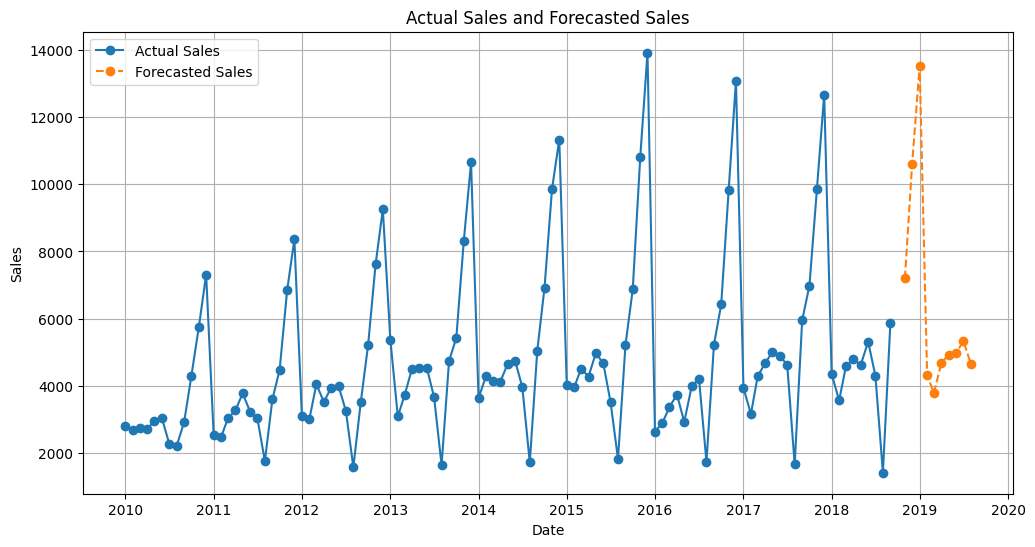

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
data = {
    "Month": [
        "2010-01", "2010-02", "2010-03", "2010-04", "2010-05", "2010-06", "2010-07",
        "2010-08", "2010-09", "2010-10", "2010-11", "2010-12", "2011-01", "2011-02",
        "2011-03", "2011-04", "2011-05", "2011-06", "2011-07", "2011-08", "2011-09",
        "2011-10", "2011-11", "2011-12", "2012-01", "2012-02", "2012-03", "2012-04",
        "2012-05", "2012-06", "2012-07", "2012-08", "2012-09", "2012-10", "2012-11",
        "2012-12", "2013-01", "2013-02", "2013-03", "2013-04", "2013-05", "2013-06",
        "2013-07", "2013-08", "2013-09", "2013-10", "2013-11", "2013-12", "2014-01",
        "2014-02", "2014-03", "2014-04", "2014-05", "2014-06", "2014-07", "2014-08",
        "2014-09", "2014-10", "2014-11", "2014-12", "2015-01", "2015-02", "2015-03",
        "2015-04", "2015-05", "2015-06", "2015-07", "2015-08", "2015-09", "2015-10",
        "2015-11", "2015-12", "2016-01", "2016-02", "2016-03", "2016-04", "2016-05",
        "2016-06", "2016-07", "2016-08", "2016-09", "2016-10", "2016-11", "2016-12",
        "2017-01", "2017-02", "2017-03", "2017-04", "2017-05", "2017-06", "2017-07",
        "2017-08", "2017-09", "2017-10", "2017-11", "2017-12", "2018-01", "2018-02",
        "2018-03", "2018-04", "2018-05", "2018-06", "2018-07", "2018-08", "2018-09"
    ],
    "R1 sales": [
        2815, 2672, 2755, 2721, 2946, 3036, 2282, 2212, 2922, 4301, 5764, 7312,
        2541, 2475, 3031, 3266, 3776, 3230, 3028, 1759, 3595, 4474, 6838, 8357,
        3113, 3006, 4047, 3523, 3937, 3986, 3260, 1573, 3528, 5211, 7614, 9254,
        5375, 3088, 3718, 4514, 4520, 4539, 3663, 1643, 4739, 5428, 8314, 10651,
        3633, 4292, 4154, 4121, 4647, 4753, 3965, 1723, 5048, 6922, 9858, 11331,
        4016, 3957, 4510, 4276, 4968, 4677, 3523, 1821, 5222, 6872, 10803, 13916,
        2639, 2899, 3370, 3740, 2927, 3986, 4217, 1738, 5221, 6424, 9842, 13076,
        3934, 3162, 4286, 4676, 5010, 4874, 4633, 1659, 5951, 6981, 9851, 12670,
        4348, 3564, 4577, 4788, 4618, 5312, 4298, 1413, 5877
    ]
}

# Convert data to DataFrame
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.set_index('Month', inplace=True)

# Initialize and fit the model
model = ExponentialSmoothing(df['R1 sales'], trend="add", seasonal="multiplicative", seasonal_periods=12)
fitted_model = model.fit(optimized=True)

# Forecast future demand for the next 10 days
forecast_periods = 10
forecast = fitted_model.forecast(forecast_periods)

# Generate future dates
future_dates = pd.date_range(start=df.index[-1] + pd.DateOffset(months=1), periods=forecast_periods, freq='M')

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Month': future_dates, 'Forecasted Sales': forecast.values})
forecast_df.set_index('Month', inplace=True)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['R1 sales'], label='Actual Sales', marker='o')
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'], label='Forecasted Sales', marker='o', linestyle='--')
plt.title('Actual Sales and Forecasted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


## Testing of  Holt-Winters Model Using `statsmodels` Library


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


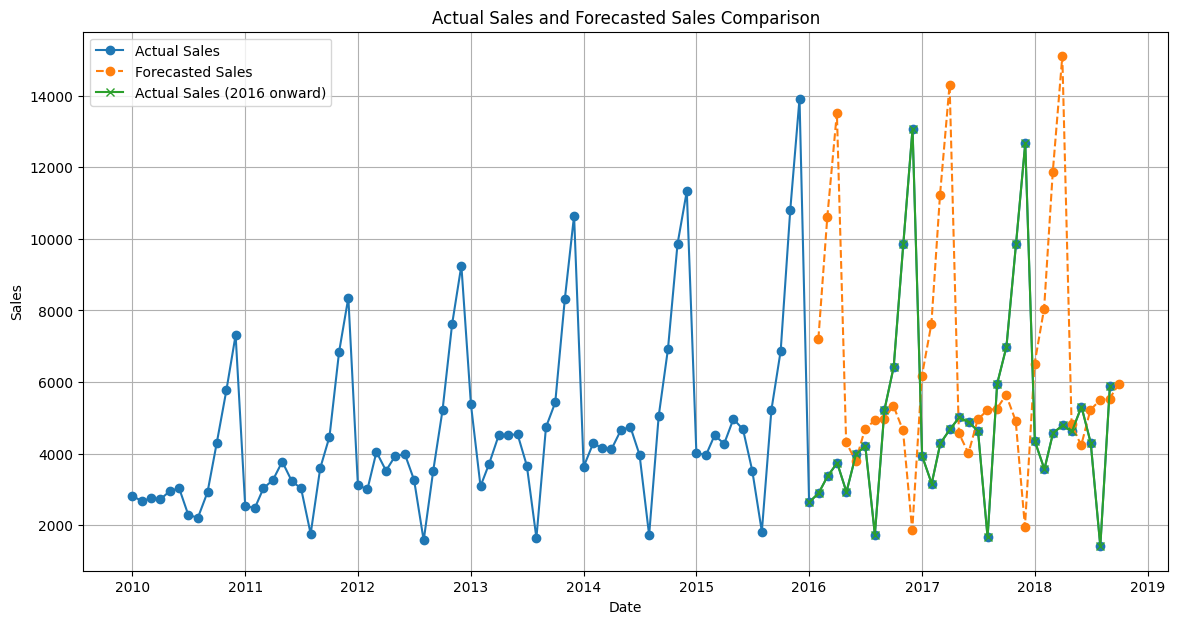

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the data
data = {
    "Month": [
        "2010-01", "2010-02", "2010-03", "2010-04", "2010-05", "2010-06", "2010-07",
        "2010-08", "2010-09", "2010-10", "2010-11", "2010-12", "2011-01", "2011-02",
        "2011-03", "2011-04", "2011-05", "2011-06", "2011-07", "2011-08", "2011-09",
        "2011-10", "2011-11", "2011-12", "2012-01", "2012-02", "2012-03", "2012-04",
        "2012-05", "2012-06", "2012-07", "2012-08", "2012-09", "2012-10", "2012-11",
        "2012-12", "2013-01", "2013-02", "2013-03", "2013-04", "2013-05", "2013-06",
        "2013-07", "2013-08", "2013-09", "2013-10", "2013-11", "2013-12", "2014-01",
        "2014-02", "2014-03", "2014-04", "2014-05", "2014-06", "2014-07", "2014-08",
        "2014-09", "2014-10", "2014-11", "2014-12", "2015-01", "2015-02", "2015-03",
        "2015-04", "2015-05", "2015-06", "2015-07", "2015-08", "2015-09", "2015-10",
        "2015-11", "2015-12", "2016-01", "2016-02", "2016-03", "2016-04", "2016-05",
        "2016-06", "2016-07", "2016-08", "2016-09", "2016-10", "2016-11", "2016-12",
        "2017-01", "2017-02", "2017-03", "2017-04", "2017-05", "2017-06", "2017-07",
        "2017-08", "2017-09", "2017-10", "2017-11", "2017-12", "2018-01", "2018-02",
        "2018-03", "2018-04", "2018-05", "2018-06", "2018-07", "2018-08", "2018-09"
    ],
    "R1 sales": [
        2815, 2672, 2755, 2721, 2946, 3036, 2282, 2212, 2922, 4301, 5764, 7312,
        2541, 2475, 3031, 3266, 3776, 3230, 3028, 1759, 3595, 4474, 6838, 8357,
        3113, 3006, 4047, 3523, 3937, 3986, 3260, 1573, 3528, 5211, 7614, 9254,
        5375, 3088, 3718, 4514, 4520, 4539, 3663, 1643, 4739, 5428, 8314, 10651,
        3633, 4292, 4154, 4121, 4647, 4753, 3965, 1723, 5048, 6922, 9858, 11331,
        4016, 3957, 4510, 4276, 4968, 4677, 3523, 1821, 5222, 6872, 10803, 13916,
        2639, 2899, 3370, 3740, 2927, 3986, 4217, 1738, 5221, 6424, 9842, 13076,
        3934, 3162, 4286, 4676, 5010, 4874, 4633, 1659, 5951, 6981, 9851, 12670,
        4348, 3564, 4577, 4788, 4618, 5312, 4298, 1413, 5877
    ]
}

# Convert data to DataFrame
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.set_index('Month', inplace=True)

# Initialize and fit the model
model = ExponentialSmoothing(df['R1 sales'], trend="add", seasonal="multiplicative", seasonal_periods=12)
fitted_model = model.fit(optimized=True)

# Forecast future demand for the period after 2015
forecast_periods = len(df.index[df.index >= '2016-01'])  # Count periods after '2015-12'
forecast = fitted_model.forecast(forecast_periods)

# Create a DataFrame for the forecast
forecast_df = pd.DataFrame({'Month': pd.date_range(start='2016-01', periods=forecast_periods, freq='M'),
                             'Forecasted Sales': forecast.values})
forecast_df.set_index('Month', inplace=True)

# Compare with actual data (from 2016 onwards)
actual_data_after_2015 = df[df.index >= '2016-01']

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['R1 sales'], label='Actual Sales', marker='o')
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'], label='Forecasted Sales', marker='o', linestyle='--')
plt.plot(actual_data_after_2015.index, actual_data_after_2015['R1 sales'], label='Actual Sales (2016 onward)', marker='x', linestyle='-')
plt.title('Actual Sales and Forecasted Sales Comparison')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


## Implementing `ARIMA`

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


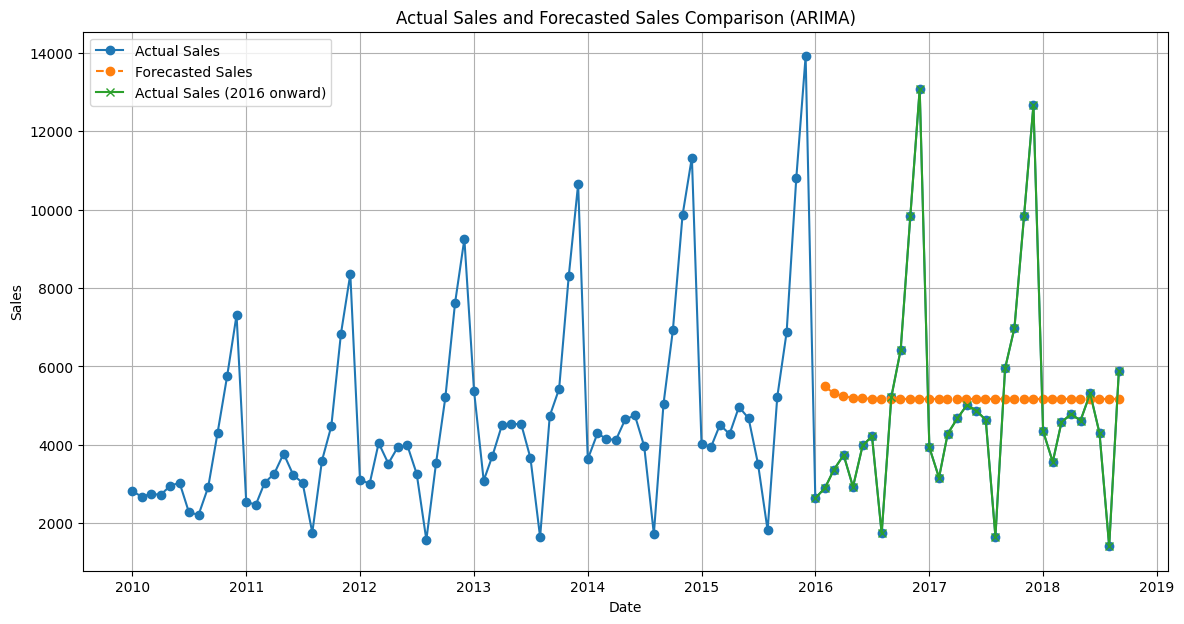

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Load the data
data = {
    "Month": [
        "2010-01", "2010-02", "2010-03", "2010-04", "2010-05", "2010-06", "2010-07",
        "2010-08", "2010-09", "2010-10", "2010-11", "2010-12", "2011-01", "2011-02",
        "2011-03", "2011-04", "2011-05", "2011-06", "2011-07", "2011-08", "2011-09",
        "2011-10", "2011-11", "2011-12", "2012-01", "2012-02", "2012-03", "2012-04",
        "2012-05", "2012-06", "2012-07", "2012-08", "2012-09", "2012-10", "2012-11",
        "2012-12", "2013-01", "2013-02", "2013-03", "2013-04", "2013-05", "2013-06",
        "2013-07", "2013-08", "2013-09", "2013-10", "2013-11", "2013-12", "2014-01",
        "2014-02", "2014-03", "2014-04", "2014-05", "2014-06", "2014-07", "2014-08",
        "2014-09", "2014-10", "2014-11", "2014-12", "2015-01", "2015-02", "2015-03",
        "2015-04", "2015-05", "2015-06", "2015-07", "2015-08", "2015-09", "2015-10",
        "2015-11", "2015-12", "2016-01", "2016-02", "2016-03", "2016-04", "2016-05",
        "2016-06", "2016-07", "2016-08", "2016-09", "2016-10", "2016-11", "2016-12",
        "2017-01", "2017-02", "2017-03", "2017-04", "2017-05", "2017-06", "2017-07",
        "2017-08", "2017-09", "2017-10", "2017-11", "2017-12", "2018-01", "2018-02",
        "2018-03", "2018-04", "2018-05", "2018-06", "2018-07", "2018-08", "2018-09"
    ],
    "R1 sales": [
        2815, 2672, 2755, 2721, 2946, 3036, 2282, 2212, 2922, 4301, 5764, 7312,
        2541, 2475, 3031, 3266, 3776, 3230, 3028, 1759, 3595, 4474, 6838, 8357,
        3113, 3006, 4047, 3523, 3937, 3986, 3260, 1573, 3528, 5211, 7614, 9254,
        5375, 3088, 3718, 4514, 4520, 4539, 3663, 1643, 4739, 5428, 8314, 10651,
        3633, 4292, 4154, 4121, 4647, 4753, 3965, 1723, 5048, 6922, 9858, 11331,
        4016, 3957, 4510, 4276, 4968, 4677, 3523, 1821, 5222, 6872, 10803, 13916,
        2639, 2899, 3370, 3740, 2927, 3986, 4217, 1738, 5221, 6424, 9842, 13076,
        3934, 3162, 4286, 4676, 5010, 4874, 4633, 1659, 5951, 6981, 9851, 12670,
        4348, 3564, 4577, 4788, 4618, 5312, 4298, 1413, 5877
    ]
}

# Convert data to DataFrame
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.set_index('Month', inplace=True)

# Fit ARIMA model
# First, we should check for stationarity and difference the data if needed.
# For simplicity, let's assume the data is already stationary for this example.

# Define the ARIMA model parameters (p, d, q)
# These parameters should ideally be determined using model selection criteria
# For demonstration, let's use (p=1, d=1, q=1)
model = ARIMA(df['R1 sales'], order=(1, 1, 1))
fitted_model = model.fit()

# Forecast future demand
forecast_periods = len(pd.date_range(start='2016-01', end='2018-09', freq='M'))
forecast = fitted_model.forecast(steps=forecast_periods)

# Create a DataFrame for the forecast
forecast_index = pd.date_range(start='2016-01', end='2018-09', freq='M')
forecast_df = pd.DataFrame({'Month': forecast_index, 'Forecasted Sales': forecast})
forecast_df.set_index('Month', inplace=True)

# Actual data from 2016 onward
actual_data_after_2015 = df[df.index >= '2016-01']

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['R1 sales'], label='Actual Sales', marker='o')
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'], label='Forecasted Sales', marker='o', linestyle='--')
plt.plot(actual_data_after_2015.index, actual_data_after_2015['R1 sales'], label='Actual Sales (2016 onward)', marker='x', linestyle='-')
plt.title('Actual Sales and Forecasted Sales Comparison (ARIMA)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


## Demand Forecasting using `TensorFlow`

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 241ms/step - loss: 0.2338 - val_loss: 0.7668
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.2002 - val_loss: 0.6904
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.1915 - val_loss: 0.6358
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.1788 - val_loss: 0.5937
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.1663 - val_loss: 0.5600
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.1558 - val_loss: 0.5286
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1422 - val_loss: 0.4917
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.1326 - val_loss: 0.4334
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 0.1156 - val_loss: 0.3426
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0788 - val_loss: 0.2301
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0474 - val_loss: 0.1063
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0196 - val_loss: 0.0106


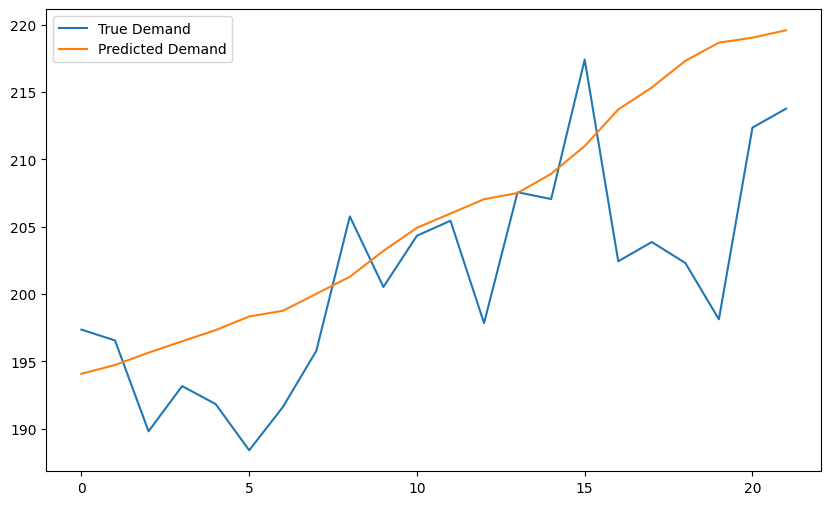

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Sample data generation (replace with actual demand data)
np.random.seed(42)
n_periods = 120
trend = np.linspace(100, 200, n_periods)
seasonal = 10 + 5 * np.sin(np.linspace(0, 2 * np.pi * (n_periods/12), n_periods))
demand = trend + seasonal + np.random.normal(scale=5, size=n_periods)

# Prepare the data
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

# Parameters
window_size = 12

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
demand_scaled = scaler.fit_transform(demand.reshape(-1, 1)).flatten()

# Create sequences
X, y = create_dataset(demand_scaled, window_size)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape for the model
X_train = X_train.reshape(-1, window_size, 1)
X_test = X_test.reshape(-1, window_size, 1)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(window_size, 1)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Predict the demand
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Evaluate the model
mse = model.evaluate(X_test, y_test)
print(f"Mean Squared Error on test data: {mse}")

# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(scaler.inverse_transform(y_test.reshape(-1, 1)), label='True Demand')
plt.plot(predictions, label='Predicted Demand')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the data
data = pd.read_csv('R1 Sales.csv', parse_dates=['Month'], index_col='Month')

# Split the data into training (up to 2015) and testing (2016 onwards)
train = data.loc[:'2015-12-31']
test = data.loc['2016-01-01':]

# Fit ARIMA model
model = ARIMA(train['R1 sales'], order=(1,1,1))  # You may need to adjust the order
results = model.fit()

# Forecast
forecast = results.forecast(steps=len(test))

# Plot the results
plt.figure(figsize=(12,6))
plt.plot(train.index, train['R1 sales'], label='Training Data')
plt.plot(test.index, test['R1 sales'], label='Actual Test Data')
plt.plot(test.index, forecast, label='Forecast')
plt.title('ARIMA Forecast vs Actual Data')
plt.legend()
plt.show()

# Calculate RMSE
rmse = sqrt(mean_squared_error(test['R1 sales'], forecast))
print(f'RMSE: {rmse}')

# Compare forecast with actual data
comparison = pd.DataFrame({'Actual': test['R1 sales'], 'Forecast': forecast})
print(comparison)

KeyError: '2015-12-31'

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 217ms/step - loss: 0.1013 - val_loss: 0.1094
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.1053 - val_loss: 0.0975
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0849 - val_loss: 0.0855
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0738 - val_loss: 0.0736
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.0773 - val_loss: 0.0619
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0571 - val_loss: 0.0513
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.0578 - val_loss: 0.0430
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0398 - val_loss: 0.0395
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0409 - val_loss: 0.0425
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.0492 - val_loss: 0.0444
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0486 - val_loss: 0.0407
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0466 - val_loss: 0.0393
Epoch 13/50

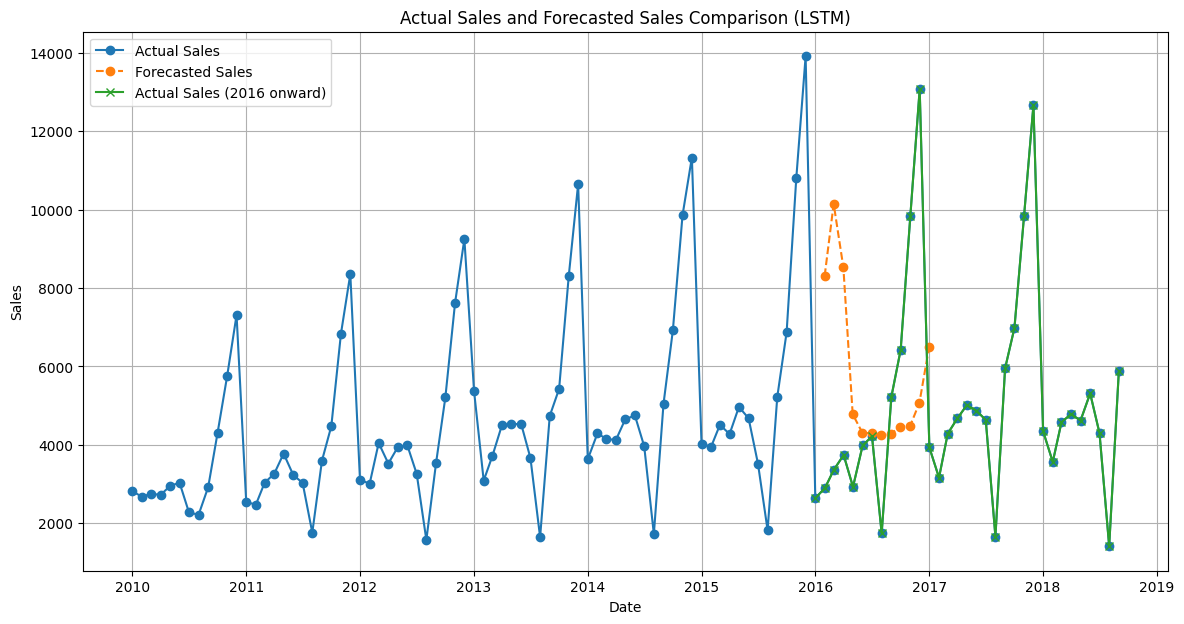

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load actual data
data = {
    "Month": [
        "2010-01", "2010-02", "2010-03", "2010-04", "2010-05", "2010-06", "2010-07",
        "2010-08", "2010-09", "2010-10", "2010-11", "2010-12", "2011-01", "2011-02",
        "2011-03", "2011-04", "2011-05", "2011-06", "2011-07", "2011-08", "2011-09",
        "2011-10", "2011-11", "2011-12", "2012-01", "2012-02", "2012-03", "2012-04",
        "2012-05", "2012-06", "2012-07", "2012-08", "2012-09", "2012-10", "2012-11",
        "2012-12", "2013-01", "2013-02", "2013-03", "2013-04", "2013-05", "2013-06",
        "2013-07", "2013-08", "2013-09", "2013-10", "2013-11", "2013-12", "2014-01",
        "2014-02", "2014-03", "2014-04", "2014-05", "2014-06", "2014-07", "2014-08",
        "2014-09", "2014-10", "2014-11", "2014-12", "2015-01", "2015-02", "2015-03",
        "2015-04", "2015-05", "2015-06", "2015-07", "2015-08", "2015-09", "2015-10",
        "2015-11", "2015-12", "2016-01", "2016-02", "2016-03", "2016-04", "2016-05",
        "2016-06", "2016-07", "2016-08", "2016-09", "2016-10", "2016-11", "2016-12",
        "2017-01", "2017-02", "2017-03", "2017-04", "2017-05", "2017-06", "2017-07",
        "2017-08", "2017-09", "2017-10", "2017-11", "2017-12", "2018-01", "2018-02",
        "2018-03", "2018-04", "2018-05", "2018-06", "2018-07", "2018-08", "2018-09"
    ],
    "R1 sales": [
        2815, 2672, 2755, 2721, 2946, 3036, 2282, 2212, 2922, 4301, 5764, 7312,
        2541, 2475, 3031, 3266, 3776, 3230, 3028, 1759, 3595, 4474, 6838, 8357,
        3113, 3006, 4047, 3523, 3937, 3986, 3260, 1573, 3528, 5211, 7614, 9254,
        5375, 3088, 3718, 4514, 4520, 4539, 3663, 1643, 4739, 5428, 8314, 10651,
        3633, 4292, 4154, 4121, 4647, 4753, 3965, 1723, 5048, 6922, 9858, 11331,
        4016, 3957, 4510, 4276, 4968, 4677, 3523, 1821, 5222, 6872, 10803, 13916,
        2639, 2899, 3370, 3740, 2927, 3986, 4217, 1738, 5221, 6424, 9842, 13076,
        3934, 3162, 4286, 4676, 5010, 4874, 4633, 1659, 5951, 6981, 9851, 12670,
        4348, 3564, 4577, 4788, 4618, 5312, 4298, 1413, 5877
    ]
}

# Convert data to DataFrame
df = pd.DataFrame(data)
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.set_index('Month', inplace=True)

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
demand_scaled = scaler.fit_transform(df['R1 sales'].values.reshape(-1, 1)).flatten()

# Create sequences
def create_dataset(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

window_size = 12
X, y = create_dataset(demand_scaled, window_size)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train = X_train.reshape(-1, window_size, 1)
X_test = X_test.reshape(-1, window_size, 1)

# Build and train the model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, activation='relu', input_shape=(window_size, 1)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test))

# Forecast future demand
# Predict on the test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

# Append the last window of actual data for forecasting future values
last_window = demand_scaled[-window_size:]
forecast_steps = 12  # Forecasting 12 months ahead
forecast = []

for _ in range(forecast_steps):
    pred = model.predict(last_window.reshape(1, window_size, 1))
    forecast.append(pred[0, 0])
    last_window = np.append(last_window[1:], pred)

forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

# Prepare data for plotting
forecast_index = pd.date_range(start='2016-01', periods=forecast_steps, freq='M')
forecast_df = pd.DataFrame({'Month': forecast_index, 'Forecasted Sales': forecast.flatten()})
forecast_df.set_index('Month', inplace=True)

# Actual data from 2016 onward
actual_data_after_2015 = df[df.index >= '2016-01']

# Plotting the results
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['R1 sales'], label='Actual Sales', marker='o')
plt.plot(forecast_df.index, forecast_df['Forecasted Sales'], label='Forecasted Sales', marker='o', linestyle='--')
plt.plot(actual_data_after_2015.index, actual_data_after_2015['R1 sales'], label='Actual Sales (2016 onward)', marker='x', linestyle='-')
plt.title('Actual Sales and Forecasted Sales Comparison (LSTM)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()


## Working on Updated Adaptive Algorithm


In [ ]:
import numpy as np
n_store = 10
forecaste_history = [np.random.randint(100, 200, n_store).tolist()]
seasonality = [1] * n_store
trend = [0] * n_store
best_a = 0.5
best_b = 0.5
best_g = 0.5
curr_min_error = 100000
def best_selector(curr_min_error, best_a, best_b, best_g) :
    error_val = curr_min_error
    updated_a = update(a)
    forecaste_update_a = forecasted(demand, forecaste_history[-1], seasonality, trend, updated_a, best_b, best_g)
    updated_b = update(b)
    forecaste_update_b = forecasted(demand, forecaste_history[-1], seasonality, trend, best_a, updated_b, best_g)
    updated_g = update(g)
    forecaste_update_g = forecasted(demand, forecaste_history[-1], seasonality, trend, best_a, best_b, updated_g)
    error_update_a = error(forecaste_update_a, demand)
    if(error_update_a < error_val) :
        best_a = updated_a
        error_val = error_update_a
    error_update_b = error(forecaste_update_b, demand)
    if(error_update_b < error_val) :
        best_b = updated_b
        error_val = error_update_b
    error_update_g = error(forecaste_update_g, demand)
    if(error_update_g < error_val) :
        best_g = updated_g
        error_val = error_update_g

    return best_a, best_b, best_g, error_val

def forecasted (demand, seasonality = seasonality, trend = trend, a = best_a, b = best_b , g = best_g, pre_forecasted = forecaste_history[-1]) :
    num_demand = np.array(demand)
    num_seasonality = np.array(seasonality)
    num_trend = np.array(trend)
    # Convert pre_forecasted to a NumPy array
    num_pre_forecasted = np.array(pre_forecasted)
    Level =  a * (num_demand / num_seasonality) + (1 - a) * (num_pre_forecasted)
    Trend = b * ( Level - num_demand) + (1 - b) * num_trend
    Seasonality = g * (Level / num_demand) +  (1 - g) * num_seasonality
    forecaste = Level * Seasonality + Trend
    return forecaste.tolist(), Seasonality.tolist(), Trend.tolist()

def error(demand, pre_forecasted = forecaste_history[-1]) :
    num_demand = np.array(demand)
    num_pre_forecasted = np.array(pre_forecasted)
    error_val = np.sum(np.absolute(num_demand - num_pre_forecasted)) / len(demand)
    return error_val

def update(parameter):
    parameter = lerp(0, np.random.rand(), 1)
    return parameter

def lerp(a, b, t) :
    return a + (b - a) * t

def func(demand, pre_forecasted = forecaste_history[-1]) :
    global best_a, best_b, best_g, curr_min_error
    best_a, best_b, best_g, curr_min_error = best_selector(curr_min_error, best_a, best_b, best_g)
    predict = forecasted(demand)
    forecaste_history.append(predict)
    return predict, best_a, best_b, best_g, curr_min_error

for day in range(100) :
    demand = np.random.randint(100, 200, n_store).tolist()
    error_value = error(demand, forecaste_history[-1])
    predict, best_a, best_b, best_g, curr_min_error = func(demand)
    print(f"Error on Day {day} : {error_value}" )



TypeError: unsupported operand type(s) for -: 'int' and 'list'